# Getting Started with PCA

In [74]:
%matplotlib inline

from sklearn.decomposition import PCA
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_context('talk')

## Loading the Dataset

In [104]:
df = pd.read_csv('data/Decathlon.csv')
df

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
7,McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [105]:
df.columns = ['name','100m','long jump','shot put','high jump','400m','110m hurdle','discus','pole vault',
             'javelin','1500m','rank','points','competition']
df.dropna(how="all", inplace=True)
df.tail()


,name,100m,long jump,shot put,high jump,400m,110m hurdle,discus,pole vault,javelin,1500m,rank,points,competition
36,Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.5,58.36,263.08,24,7592,OlympicG
37,Karlivans,11.33,7.26,13.30,1.97,50.54,14.98,43.34,4.5,52.92,278.67,25,7583,OlympicG
38,Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.7,53.05,317.00,26,7573,OlympicG
39,Uldal,11.23,6.99,13.53,1.85,50.95,15.09,43.01,4.5,60.00,281.70,27,7495,OlympicG
40,Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.4,58.62,296.12,28,7404,OlympicG


In [76]:
X = df.ix[:,1:11]
X.tail()

,100m,long jump,shot put,high jump,400m,110m hurdle,discus,pole vault,javelin,1500m
36,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.5,58.36,263.08
37,11.33,7.26,13.30,1.97,50.54,14.98,43.34,4.5,52.92,278.67
38,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.7,53.05,317.00
39,11.23,6.99,13.53,1.85,50.95,15.09,43.01,4.5,60.00,281.70
40,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.4,58.62,296.12


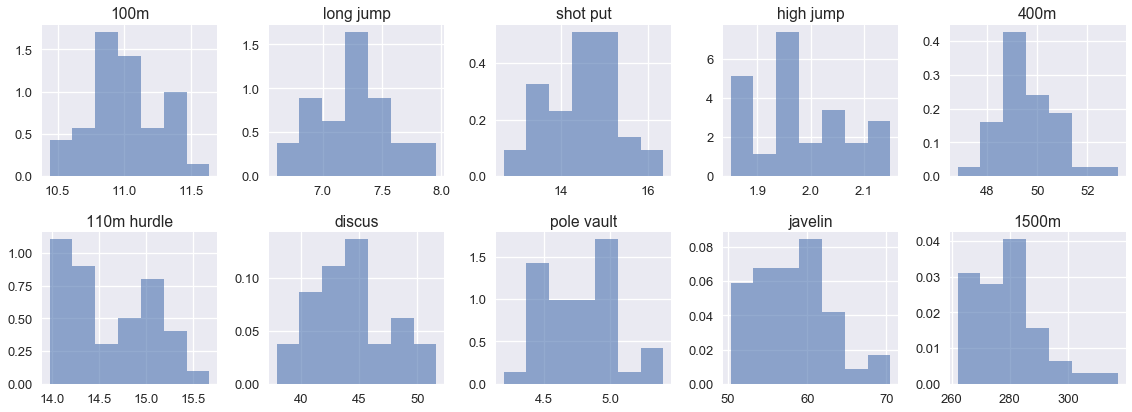

In [111]:
plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
k = 1
for c in X.columns:
    plt.subplot(2,5,k)
    plt.hist(X[c],normed=True,alpha=0.6,bins=7)
    plt.title(c)
    k += 1
plt.tight_layout()

## Scaling and Centering

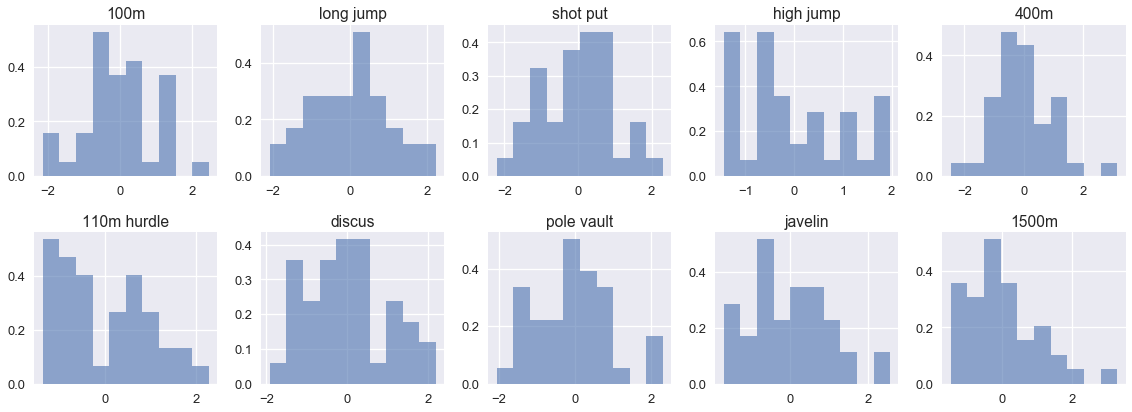

In [77]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

lbls = X.columns

plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
k = 0
for c in lbls:
    plt.subplot(2,5,k+1)
    plt.hist(X_std[:,k],normed=True,alpha=0.6)
    plt.title(c)
    k += 1
plt.tight_layout()

## PCA Analysis

In [127]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X_std)

[ 0.32719055  0.1737131   0.14049167]


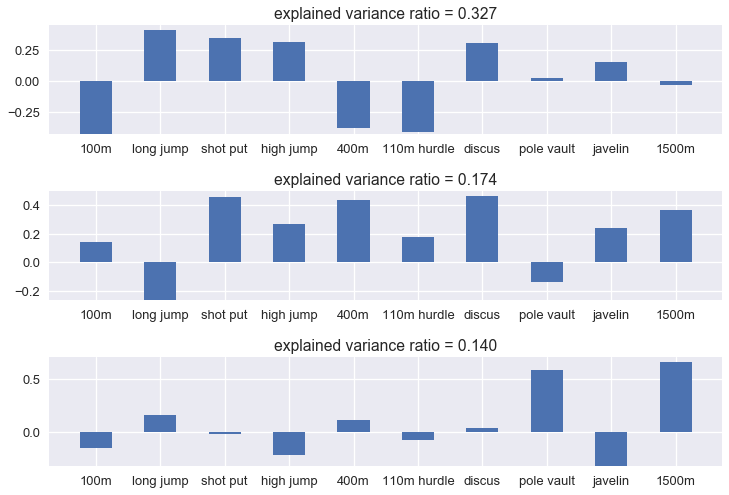

In [128]:
w = pca.components_
v = pca.explained_variance_ratio_
print(v)

for k in range(0,len(w)):
    plt.subplot(3,1,k+1)
    plt.bar(range(0,len(w[k])),w[k],width=.5)
    plt.xticks(range(0,len(w[k])),lbls)
    plt.title('explained variance ratio = {0:.3f}'.format(v[k]))

plt.tight_layout()

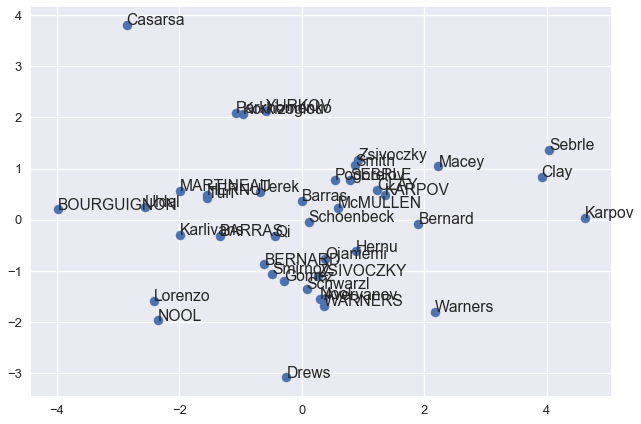

In [102]:
plt.scatter(Y[:,0],Y[:,1])
k = 0
for n in df['name']:
    plt.text(Y[k,0],Y[k,1],n)
    k += 1